In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("customer churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
df.info()

#Replace blanks with 0 as tenure is 0 and no of total charges are recorded,
#Change the data type also

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df["customerID"].duplicated()

Convert 0 and 1 values of SeniorCitizen to Yes/No to make it easir to understand

In [114]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# Now we figure out the Data

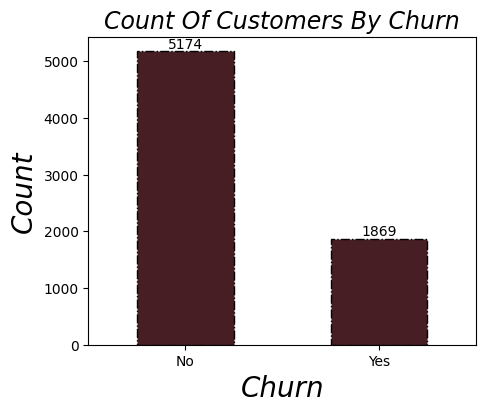

In [125]:
plt.figure(figsize = (5,4))

ax=sns.countplot(x="Churn", data=df, width=0.5, color="#65000B", edgecolor="black", linestyle="-.", saturation=0.4)
ax.bar_label(ax.containers[0])

plt.title("Count Of Customers By Churn", fontsize=17, fontstyle= 'oblique')
plt.xlabel("Churn", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Count", fontsize=20, fontstyle= 'oblique')
plt.show()


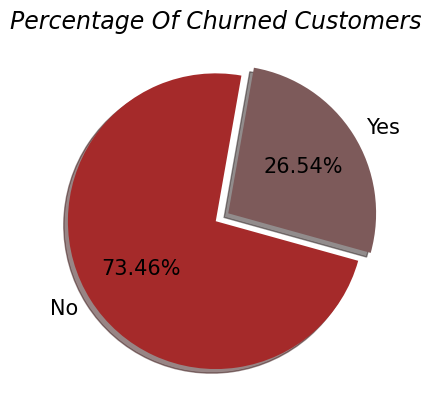

In [28]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(x="Churn", data=gb, labels=gb.index, autopct="%1.2f%%",explode=[0,0.1],startangle=80, shadow=True,colors = ["#A52A2A", "#7D5A5A"],
        textprops={"fontsize": 15,"color":"black"})
plt.title("Percentage Of Churned Customers", fontsize=17, fontstyle= 'oblique')
plt.show()

##From the given Pie chart we can conclude that 26.54% of our customer are churned out

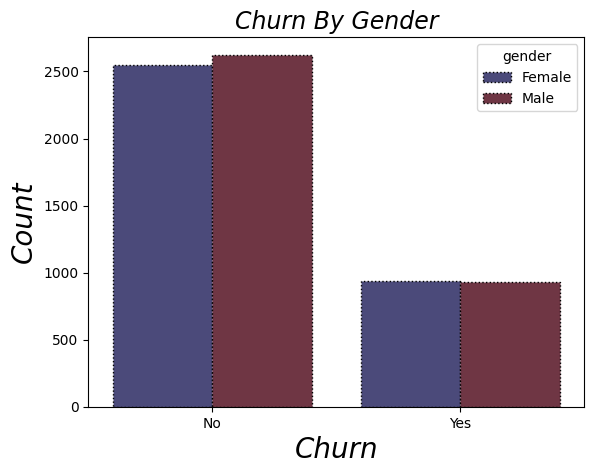

In [126]:
sns.countplot(x="Churn", data=df, hue="gender", palette="icefire", edgecolor="black", linestyle=":")

plt.title("Churn By Gender", fontsize=17, fontstyle= 'oblique')
plt.xlabel("Churn", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Count", fontsize=20, fontstyle= 'oblique')
plt.show()

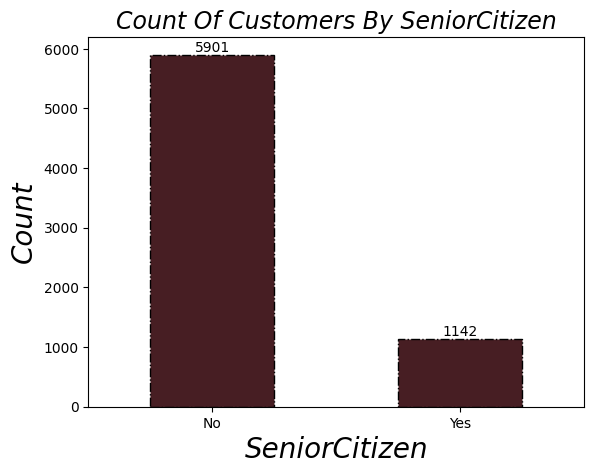

In [127]:
ax=sns.countplot(x="SeniorCitizen", data=df, width=0.5, color="#65000B", edgecolor="black", linestyle="-.", saturation=0.4)
ax.bar_label(ax.containers[0])

plt.title("Count Of Customers By SeniorCitizen", fontsize=17, fontstyle= 'oblique')
plt.xlabel("SeniorCitizen", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Count", fontsize=20, fontstyle= 'oblique')
plt.show()

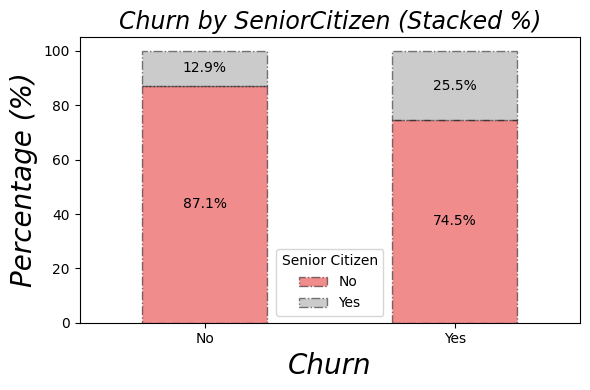

In [132]:
import pandas as pd
import matplotlib.pyplot as plt


counts = pd.crosstab(df["Churn"], df["SeniorCitizen"])


percentages = counts.div(counts.sum(axis=1), axis=0) * 100


ax = percentages.plot(kind='bar', stacked=True, colormap="Set1", edgecolor="black", linestyle="-.", figsize=(6, 4), alpha=0.5)


for i, (index, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for col in percentages.columns:
        value = row[col]
        if value > 0:
            plt.text(i, cumulative + value/2, f"{value:.1f}%", ha='center', va='center', fontsize=10)
        cumulative += value


plt.title("Churn by SeniorCitizen (Stacked %)", fontsize=17, fontstyle= 'oblique')
plt.xlabel("Churn", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Percentage (%)", fontsize=20, fontstyle= 'oblique')
plt.legend(title="Senior Citizen", labels=["No", "Yes"], loc=8)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A greater percentage of Senior Citizens have churned out compared to Non-Senior Citizens.
This means that Senior Citizens are more likely to leave the service than Non-Senior customers.


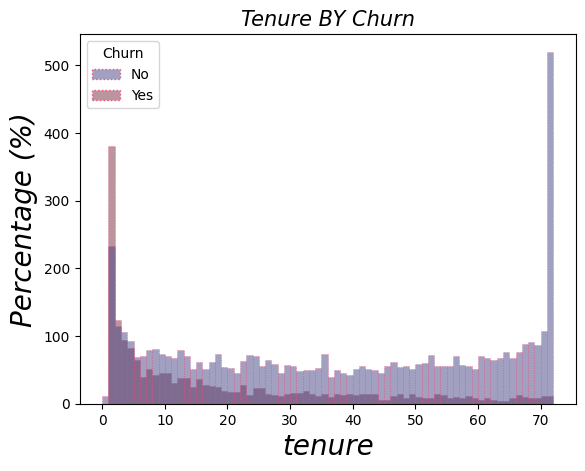

In [103]:
sns.histplot(x="tenure", data=df, bins=72, hue="Churn", palette="icefire", edgecolor="#e75480", linestyle=":")

plt.title("Tenure BY Churn", fontsize=15, fontstyle= 'oblique')
plt.xlabel("tenure", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Percentage (%)", fontsize=20, fontstyle= 'oblique')
plt.show()

People who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

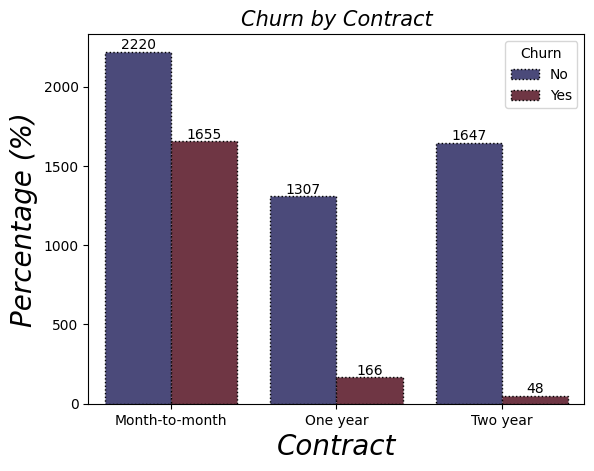

In [128]:
ax=sns.countplot(x="Contract", data=df, hue="Churn", palette="icefire", edgecolor="black", linestyle=":")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
    
plt.title("Churn by Contract", fontsize=15, fontstyle= 'oblique')
plt.xlabel("Contract", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Percentage (%)", fontsize=20, fontstyle= 'oblique')
plt.show()

People who have Month-to-month contract  are likely to churn then from those who have One or Two year of contract.

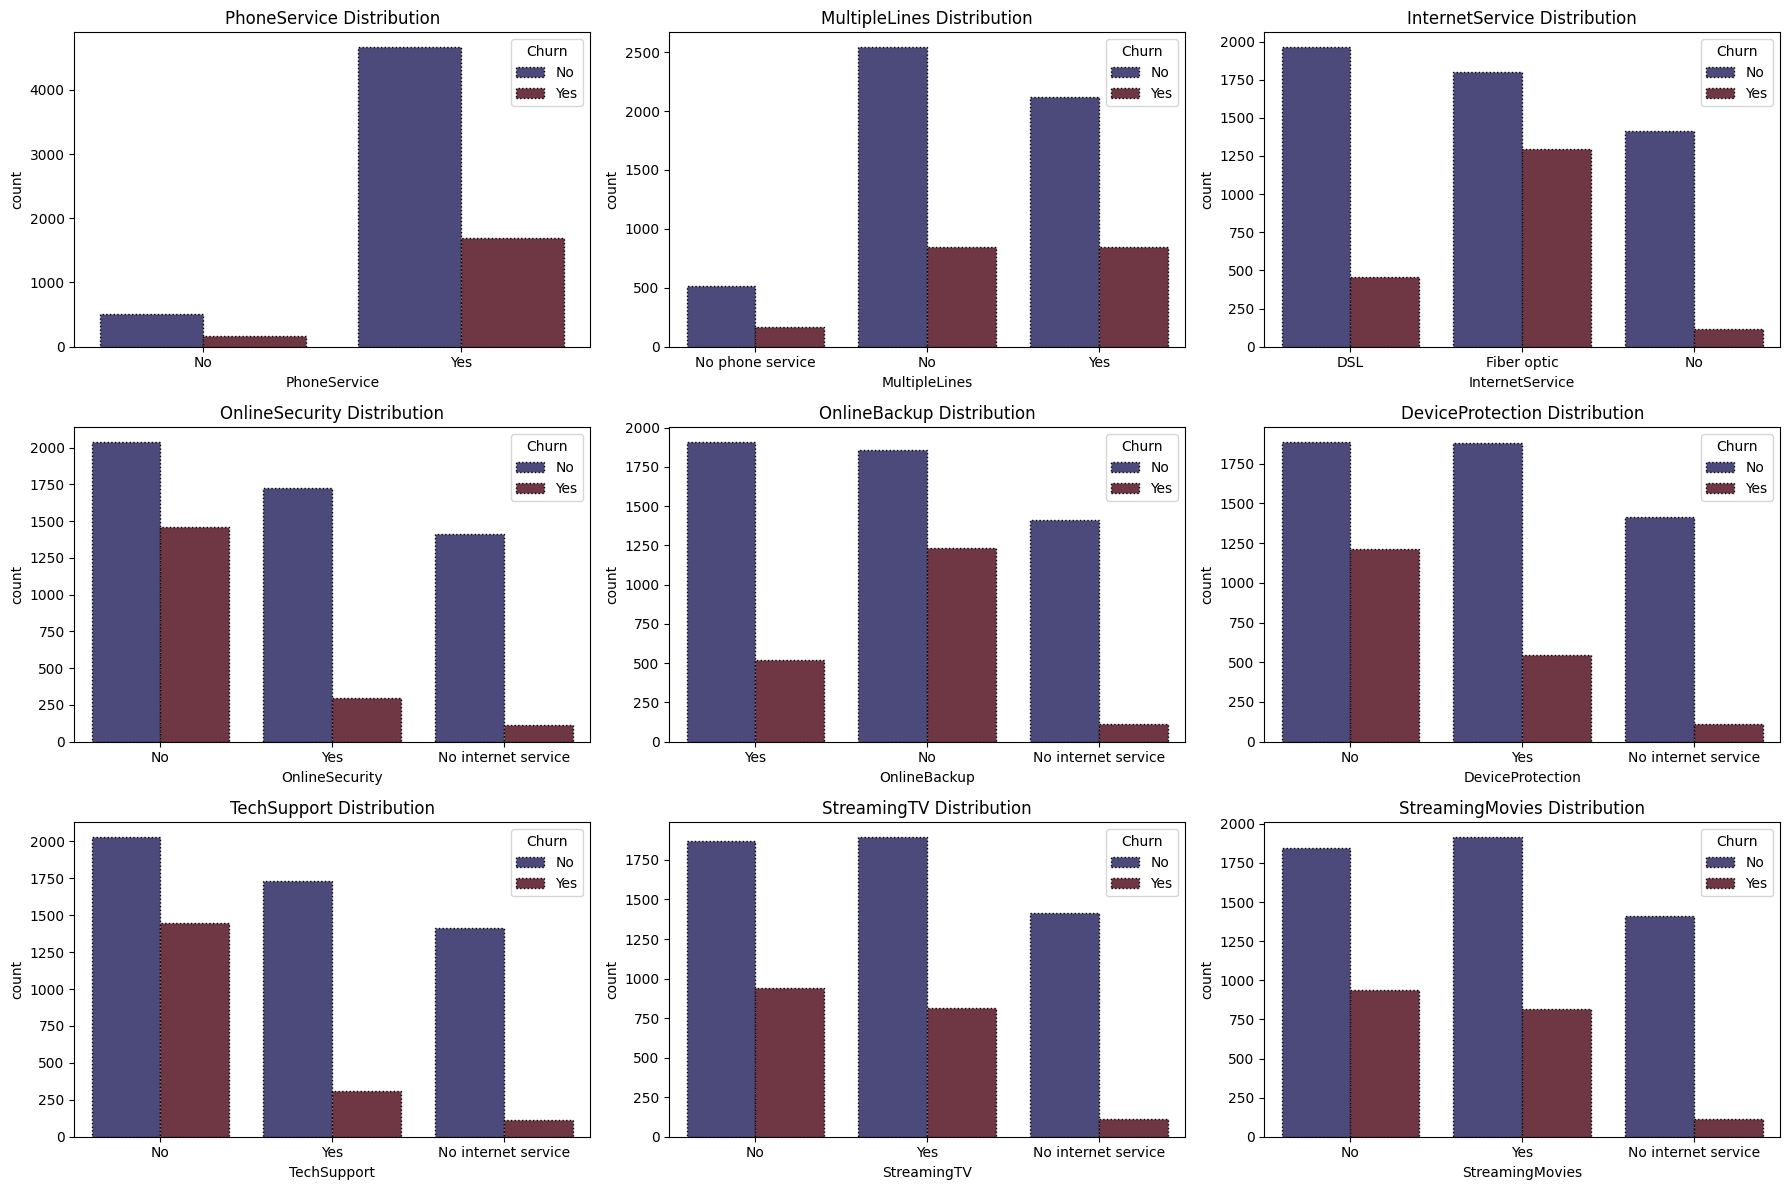

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("customer churn.csv")


cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy iteration

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue="Churn", palette="icefire", edgecolor="black", linestyle=":")
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

 Customers not using online services like OnlineSecurity, TechSuppor and DeviceProtection have higher churn rates.
     Those with Fiber Optic internet and Streaming services also show increased churn.
In contrast, customers with PhoneService and OnlineBackup show more stability and lower churn.
         Overall, limited service usage is linked to a greater risk of churn.

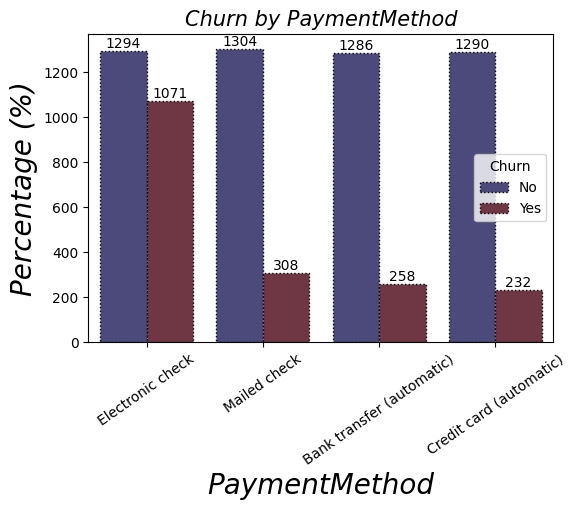

In [130]:
plt.figure(figsize = (6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette="icefire", edgecolor="black", linestyle=":")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.title("Churn by PaymentMethod", fontsize=15, fontstyle= 'oblique')
plt.xlabel("PaymentMethod", fontsize=20, fontstyle= 'oblique')
plt.ylabel("Percentage (%)", fontsize=20, fontstyle= 'oblique')
plt.xticks(rotation= 35)
plt.show()

Customers using electronic checks have the highest churn rate, while automatic payments show much lower churn.
Manual payment methods are linked to a greater risk of customer churn.